In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/AI/Train'
test_dir = '/content/drive/MyDrive/AI/Test'

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/AI/Train/Bears')))
print(len(os.listdir('/content/drive/MyDrive/AI/Train/Pandas')))
print(len(os.listdir('/content/drive/MyDrive/AI/Test/Bears')))
print(len(os.listdir('/content/drive/MyDrive/AI/Test/Pandas')))


250
250
50
50


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Pandas vs. Bears)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
13/13 [==============================] - 196s 14s/step - loss: 2.6001 - accuracy: 0.5800 - val_loss: 0.3477 - val_accuracy: 0.8600
Epoch 2/3
13/13 [==============================] - 146s 11s/step - loss: 0.3021 - accuracy: 0.8975 - val_loss: 0.2421 - val_accuracy: 0.8800
Epoch 3/3
13/13 [==============================] - 144s 11s/step - loss: 0.1145 - accuracy: 0.9600 - val_loss: 0.0645 - val_accuracy: 0.9900


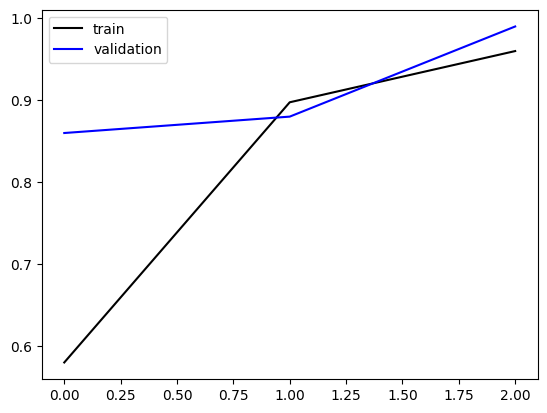

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='black',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

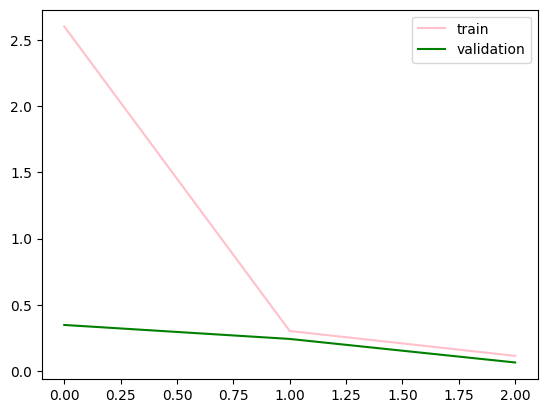

In [10]:
plt.plot(history.history['loss'],color='pink',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

4/4 [==============================] - 33s 7s/step
[[0.9995686 ]
 [0.89555055]
 [0.9906632 ]
 [0.02582899]
 [0.10012626]
 [0.09267906]
 [0.99999857]
 [0.01497675]
 [0.99994785]
 [0.99905145]
 [0.99983853]
 [0.01177575]
 [0.04495561]
 [0.9915077 ]
 [0.99999917]
 [0.04118504]
 [0.00434316]
 [0.9996638 ]
 [0.9997986 ]
 [0.9965906 ]
 [0.0206878 ]
 [0.00759517]
 [0.9999263 ]
 [0.999832  ]
 [0.9554173 ]
 [0.34051433]
 [0.01775981]
 [0.00438965]
 [0.996426  ]
 [0.95043445]
 [0.9954265 ]
 [0.9999969 ]
 [0.9926487 ]
 [0.9999999 ]
 [0.08529615]
 [0.00399402]
 [0.17762367]
 [0.00312965]
 [0.04885152]
 [0.01031477]
 [0.9965608 ]
 [0.02101094]
 [0.7822774 ]
 [0.99661773]
 [0.0125846 ]
 [0.01170013]
 [0.99973196]
 [0.9301907 ]
 [0.9996846 ]
 [0.9971889 ]
 [0.01132005]
 [0.99940217]
 [0.02190619]
 [0.00747195]
 [0.01002064]
 [0.99995863]
 [0.007865  ]
 [0.0206269 ]
 [0.00265381]
 [0.59843993]
 [0.99894756]
 [0.99999106]
 [0.99992174]
 [0.03676662]
 [0.01667606]
 [0.9195874 ]
 [0.9999792 ]
 [0.9999904

In [13]:
len(predictions)

100

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[22 28]
 [29 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.44      0.44        50
           1       0.43      0.42      0.42        50

    accuracy                           0.43       100
   macro avg       0.43      0.43      0.43       100
weighted avg       0.43      0.43      0.43       100

